In [24]:
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.tree import DecisionTreeClassifier
from sklearn.utils import shuffle
from util import plot_decision_boundary

In [39]:
N = 500
dims = 2
X = np.random.randn(N,dims)

In [40]:
X

array([[-8.77308568e-01, -5.59858924e-01],
       [-9.54219469e-01,  4.51141930e-01],
       [-5.45799538e-02,  1.00185576e+00],
       [-7.53156419e-01, -1.19586003e+00],
       [ 4.74161110e-01, -1.55651961e-01],
       [ 1.06835529e-01,  2.25271513e-02],
       [-6.31121220e-01,  6.77696794e-01],
       [-5.68853252e-01,  1.20009081e+00],
       [ 4.47711915e-02,  2.70056189e-01],
       [ 1.54711514e-01, -1.08760673e-01],
       [ 3.78146176e-01, -1.34390640e+00],
       [-8.36126781e-01, -1.29013431e-01],
       [-1.58430191e-01,  1.54786948e+00],
       [ 4.66167390e-01,  1.34506629e+00],
       [ 3.68084542e-01, -7.59093620e-01],
       [-1.31327652e+00, -2.33044716e-01],
       [-2.10871578e+00,  1.12083580e+00],
       [ 7.59750911e-01, -6.18574673e-02],
       [-1.35814507e-01, -1.13313914e+00],
       [ 1.08281920e+00,  1.93457409e+00],
       [ 1.14033496e+00,  1.35477671e+00],
       [ 4.58029361e-01,  1.06951106e+00],
       [-1.47018293e+00,  7.41871319e-01],
       [-4.

In [41]:
sep = 3
X[:125] += np.array([sep,sep])
X[125:250] += np.array([sep,-sep])
X[250:375] += np.array([-sep,-sep])
X[375:] += np.array([-sep,sep])
Y = np.array([0] * 125 + [1] * 125 + [0] * 125 + [1] * 125)

In [42]:
X

array([[ 2.12269143,  2.44014108],
       [ 2.04578053,  3.45114193],
       [ 2.94542005,  4.00185576],
       [ 2.24684358,  1.80413997],
       [ 3.47416111,  2.84434804],
       [ 3.10683553,  3.02252715],
       [ 2.36887878,  3.67769679],
       [ 2.43114675,  4.20009081],
       [ 3.04477119,  3.27005619],
       [ 3.15471151,  2.89123933],
       [ 3.37814618,  1.6560936 ],
       [ 2.16387322,  2.87098657],
       [ 2.84156981,  4.54786948],
       [ 3.46616739,  4.34506629],
       [ 3.36808454,  2.24090638],
       [ 1.68672348,  2.76695528],
       [ 0.89128422,  4.1208358 ],
       [ 3.75975091,  2.93814253],
       [ 2.86418549,  1.86686086],
       [ 4.0828192 ,  4.93457409],
       [ 4.14033496,  4.35477671],
       [ 3.45802936,  4.06951106],
       [ 1.52981707,  3.74187132],
       [ 2.52622676,  3.11783127],
       [ 3.75440091,  4.16821933],
       [ 3.19029217,  2.14859068],
       [ 3.45922303,  2.01596263],
       [ 4.76512499,  2.49976918],
       [ 3.56483235,

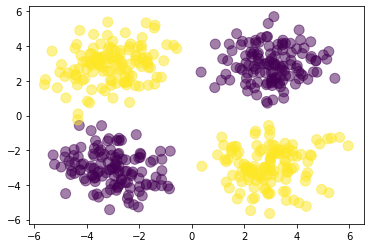

In [43]:
plt.scatter(X[:,0],X[:,1],s=100,c = Y , alpha=0.5)

In [44]:
X.shape

(500, 2)

In [45]:
model = DecisionTreeClassifier()

In [46]:
model.fit(X,Y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [47]:
print("Accuracy of model : ",model.score(X,Y))

Accuracy of model :  1.0


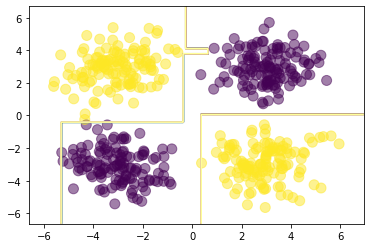

In [48]:
plt.scatter(X[:,0],X[:,1],s=100,c = Y , alpha=0.5)
plot_decision_boundary(X,model)
plt.show()

In [58]:
class BaggedTreeClassifier:
    def __init__(self,B):
        self.B = B
    
    def fit(self,X,Y):
        N = len(X)
        self.models = []
        for b in range(self.B):
            idx = np.random.choice(N,size = N , replace = True)
            Xb = X[idx]
            Yb = Y[idx]
            
            model = DecisionTreeClassifier(max_depth=2)
            model.fit(Xb,Yb)
            self.models.append(model)
    def predict(self,X):
        preds = np.zeros(len(X))
        for model in self.models:
            preds += model.predict(X)
        return np.round(preds / self.B)
    
    def score(self,X,Y):
        pred = self.predict(X)
        return np.mean(Y == pred)


In [59]:
model = BaggedTreeClassifier(500)
model.fit(X,Y)

print("accuracy of bagged model : ",model.score(X,Y))

accuracy of bagged model :  0.904


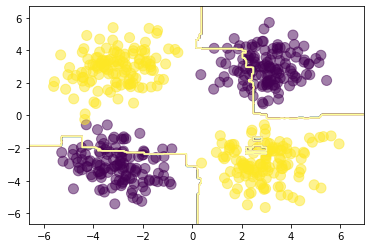

In [60]:
plt.scatter(X[:,0],X[:,1],s = 100 , c = Y,alpha=0.5)
plot_decision_boundary(X,model)
plt.show()